In [180]:
import numpy as np
import pandas as pd

In [181]:
date = ["2019-01-03", "2021-11-22", "2023-01-05"]
name = ["J", "Y", "O"]
df = pd.DataFrame({'date': date, "name": name})
df

,date,name
0,2019-01-03,J
1,2021-11-22,Y
2,2023-01-05,O


In [182]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 180.0+ bytes


In [183]:
df1 = df.set_index('date')
df1

,name
date,
2019-01-03,J
2021-11-22,Y
2023-01-05,O


In [184]:
df.reset_index(inplace=True)
df1=pd.DataFrame({'date':['2019-01-03', '2021-11-22', '2021-12-03', '2023-01-05'], 'x1' : [0.1,2.0,np.nan, 1.2]})
df1

,date,x1
0,2019-01-03,0.1
1,2021-11-22,2.0
2,2021-12-03,NaN
3,2023-01-05,1.2


In [185]:
df1["date"] = pd.to_datetime(df1["date"], format="%Y-%m-%d")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4 non-null      datetime64[ns]
 1   x1      3 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 196.0 bytes


In [186]:
df1.set_index("date", inplace=True)
df1

,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-03,NaN
2023-01-05,1.2


In [187]:
df1.isnull().sum()

x1    1
dtype: int64

In [188]:
df1 = df1.fillna(method="ffill")    # 가장 최근값으로 결측치를 채운다는 의미
df1

C:\Users\it\AppData\Local\Temp\ipykernel_15192\323412966.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1 = df1.fillna(method="ffill")    # 가장 최근값으로 결측치를 채운다는 의미


,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-03,2.0
2023-01-05,1.2


In [189]:
df2 = pd.DataFrame({"date": ["2019-01-03", "2021-11-22", "2021-12-03", "2023-01-05"], "x1": [0.1, 2.0, np.nan, 1.2]})
df2

,date,x1
0,2019-01-03,0.1
1,2021-11-22,2.0
2,2021-12-03,NaN
3,2023-01-05,1.2


In [190]:
df2 = df2.dropna()
df2

,date,x1
0,2019-01-03,0.1
1,2021-11-22,2.0
3,2023-01-05,1.2


In [191]:
df3 = pd.DataFrame({"date": ["2019-01-03", "2021-11-22", "2021-12-03", "2023-01-05"], "x1": [0.1, 2.0, np.nan, 1.2]})
df3

,date,x1
0,2019-01-03,0.1
1,2021-11-22,2.0
2,2021-12-03,NaN
3,2023-01-05,1.2


In [192]:
df3 = df3.interpolate() # 결측치를 직전값과 직후값의 평균값으로 채움
df3

C:\Users\it\AppData\Local\Temp\ipykernel_15192\3094797002.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df3 = df3.interpolate() # 결측치를 직전값과 직후값의 평균값으로 채움


,date,x1
0,2019-01-03,0.1
1,2021-11-22,2.0
2,2021-12-03,1.6
3,2023-01-05,1.2


In [193]:
df4 = pd.DataFrame({"date": ["2019-01-03", "2021-11-22", "2021-12-03", "2023-01-05"], "x1": [0.1, 2.0, 1.6, 1.2]})
df4["date"] = pd.to_datetime(df4["date"])
df4.set_index("date", inplace=True)
df4

,x1
date,
2019-01-03,0.1
2021-11-22,2.0
2021-12-03,1.6
2023-01-05,1.2


In [194]:
df5 = df4.asfreq("Y", method="ffill")   # 이렇게하면 해당 년도(Y) 중 가장 느린 날로 구성된 데이터 프레임을 만듬
# 대신 인덱스는 무조건 datetime형이여야 함
# 그리고 미래 데이터는 채워넣을 수 없음, 무조건 사잇날짜만 자동으로 채움
# 그리고 채워넣는 값은 직전 날짜의 값임
df5

C:\Users\it\AppData\Local\Temp\ipykernel_15192\4008336334.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df5 = df4.asfreq("Y", method="ffill")   # 이렇게하면 해당 년도(Y) 중 가장 느린 날로 구성된 데이터 프레임을 만듬


,x1
date,
2019-12-31,0.1
2020-12-31,0.1
2021-12-31,1.6
2022-12-31,1.6


In [195]:
df6 = df4.asfreq("m", method="ffill")
df6

C:\Users\it\AppData\Local\Temp\ipykernel_15192\3412901438.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  df6 = df4.asfreq("m", method="ffill")


,x1
date,
2019-01-31,0.1
2019-02-28,0.1
2019-03-31,0.1
2019-04-30,0.1
2019-05-31,0.1
2019-06-30,0.1
2019-07-31,0.1
2019-08-31,0.1
2019-09-30,0.1


In [196]:
df = pd.DataFrame({"date": ["2019-01-06", "2021-01-13", "2021-01-20", "2021-01-27", "2021-02-03"], "x1": [5, 4, 3, 2, 7]})
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df

,x1
date,
2019-01-06,5
2021-01-13,4
2021-01-20,3
2021-01-27,2
2021-02-03,7


In [197]:
print("원본")
print("==" * 20)
print(df)

temp1 = df.rolling(1).mean()
print("==" * 20)
print(temp1)

temp2 = df.rolling(2).mean()
print("==" * 20)
print(temp2)

temp3 = df.rolling(3).mean()
print("==" * 20)
print(temp3)

원본
            x1
date          
2019-01-06   5
2021-01-13   4
2021-01-20   3
2021-01-27   2
2021-02-03   7
             x1
date           
2019-01-06  5.0
2021-01-13  4.0
2021-01-20  3.0
2021-01-27  2.0
2021-02-03  7.0
             x1
date           
2019-01-06  NaN
2021-01-13  4.5
2021-01-20  3.5
2021-01-27  2.5
2021-02-03  4.5
             x1
date           
2019-01-06  NaN
2021-01-13  NaN
2021-01-20  4.0
2021-01-27  3.0
2021-02-03  4.0


In [198]:
print(df)
print("==" * 20)

y_diff = df.diff()
print(y_diff)

temp = pd.concat([df, y_diff], axis=1)
print("==" * 20)
print(temp)

temp2 = pd.concat([df, y_diff])
print("==" * 20)
print(temp2)

            x1
date          
2019-01-06   5
2021-01-13   4
2021-01-20   3
2021-01-27   2
2021-02-03   7
             x1
date           
2019-01-06  NaN
2021-01-13 -1.0
2021-01-20 -1.0
2021-01-27 -1.0
2021-02-03  5.0
            x1   x1
date               
2019-01-06   5  NaN
2021-01-13   4 -1.0
2021-01-20   3 -1.0
2021-01-27   2 -1.0
2021-02-03   7  5.0
             x1
date           
2019-01-06  5.0
2021-01-13  4.0
2021-01-20  3.0
2021-01-27  2.0
2021-02-03  7.0
2019-01-06  NaN
2021-01-13 -1.0
2021-01-20 -1.0
2021-01-27 -1.0
2021-02-03  5.0


In [199]:
print(df)
df['shift'] = df['x1'].shift(1)
print(df)
df['shift2'] = df['x1'].shift(2)
print(df)


            x1
date          
2019-01-06   5
2021-01-13   4
2021-01-20   3
2021-01-27   2
2021-02-03   7
            x1  shift
date                 
2019-01-06   5    NaN
2021-01-13   4    5.0
2021-01-20   3    4.0
2021-01-27   2    3.0
2021-02-03   7    2.0
            x1  shift  shift2
date                         
2019-01-06   5    NaN     NaN
2021-01-13   4    5.0     NaN
2021-01-20   3    4.0     5.0
2021-01-27   2    3.0     4.0
2021-02-03   7    2.0     3.0


In [200]:
# bfill : 뒤쪽값으로 결측치를 채움
# ffill : 앞쪽값으로 결측치를 채움
df= df.fillna(method='bfill')
df

C:\Users\it\AppData\Local\Temp\ipykernel_15192\2104531702.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='bfill')


,x1,shift,shift2
date,,,
2019-01-06,5,5.0,5.0
2021-01-13,4,5.0,5.0
2021-01-20,3,4.0,5.0
2021-01-27,2,3.0,4.0
2021-02-03,7,2.0,3.0


In [201]:
df = pd.DataFrame({'color' : ['red', 'blue', 'green', 'blue', 'red']})
df
# 원 핫 인코딩 : 범주형 변수를 컴퓨터가 처리할 수 있는 형태로 변환하는 방법 중 하나
one_hot=pd.get_dummies(df['color'])
print(one_hot)
print('=='*20)
one_hot=pd.get_dummies(df['color'], dtype=np.int64)
print(one_hot)

    blue  green    red
0  False  False   True
1   True  False  False
2  False   True  False
3   True  False  False
4  False  False   True
   blue  green  red
0     0      0    1
1     1      0    0
2     0      1    0
3     1      0    0
4     0      0    1


In [202]:
animal = ["개", "고양이", "토끼", "사슴", "개", "사슴", "고양이"]
df = pd.DataFrame({"name": animal})
one_hot = pd.get_dummies(df["name"], dtype=np.int64)
one_hot

,개,고양이,사슴,토끼
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0
5,0,0,1,0
6,0,1,0,0


In [203]:
! pip install finance-DataReader

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [205]:
df = fdr.StockListing("NASDAQ")
df

100%|██████████| 3652/3652 [00:03<00:00, 977.93it/s] 


,Symbol,Name,IndustryCode,Industry
0,MSFT,Microsoft Corp,57201020,소프트웨어
1,NVDA,NVIDIA Corp,57101010,반도체
2,AAPL,Apple Inc,57106020,전화 및 소형 장치
3,AMZN,Amazon.com Inc,53402010,백화점
4,META,Meta Platforms Inc,57201030,온라인 서비스
...,...,...,...,...
3647,QSEAR,Quartzsea Acquisition Rights,55601010,투자 지주 회사
3648,LHAI,Linkhome Holdings Inc,60101010,"부동산 임대, 개발 및 운영"
3649,CHACR,Crane Harbor Acquistion Rights Exp 17th April ...,55601010,투자 지주 회사
3650,MBNKO,Medallion Bank Fixed Rate Reset Non Cumulative...,55101010,은행


In [206]:
df = fdr.DataReader("TSLA", start="2024-01-01")
df

,Open,High,Low,Close,Volume,Adj Close
2024-01-02,250.080002,251.250000,244.410004,248.419998,104654200,248.419998
2024-01-03,244.979996,245.679993,236.320007,238.449997,121082600,238.449997
2024-01-04,239.250000,242.699997,237.729996,237.929993,102629300,237.929993
2024-01-05,236.860001,240.119995,234.899994,237.490005,92379400,237.490005
2024-01-08,236.139999,241.250000,235.300003,240.449997,85166600,240.449997
...,...,...,...,...,...,...
2025-05-16,346.239990,351.619995,342.329987,349.980011,95895700,349.980011
2025-05-19,336.299988,343.000000,333.369995,342.089996,88869900,342.089996
2025-05-20,347.869995,354.989990,341.630005,343.820007,131715500,343.820007
2025-05-21,344.429993,347.350006,332.200012,334.619995,102354800,334.619995


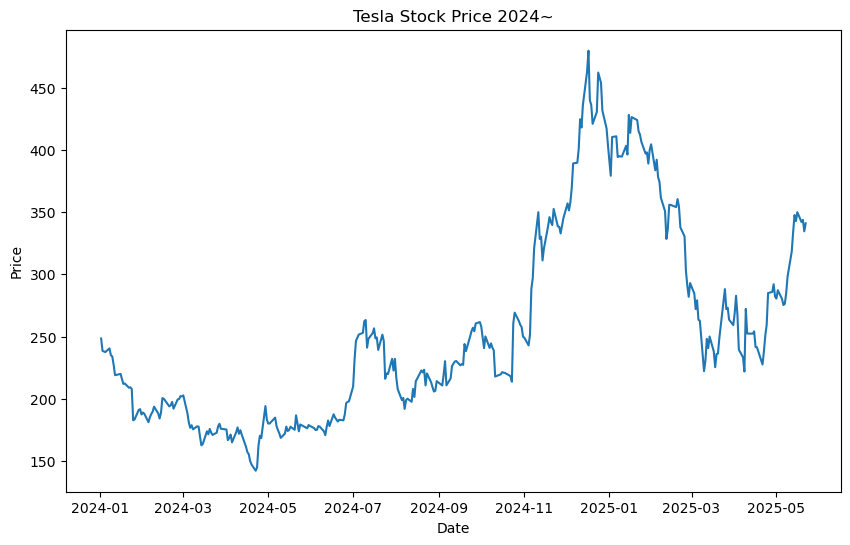

In [207]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df["Close"])
plt.title("Tesla Stock Price 2024~")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [208]:
tsla_month = df.resample("BME").mean()  # 한달의 마지막을 영업일 기준으로 하여 달마다 평균을 구하는 것임
tsla_month

,Open,High,Low,Close,Volume,Adj Close
2024-01-31,217.457145,220.442856,213.241904,216.130476,1.116088e+08,216.130476
2024-02-29,191.735999,195.604501,188.311499,192.793001,1.009954e+08,192.793001
2024-03-29,177.000002,180.102499,173.108500,176.163000,9.494521e+07,176.163000
2024-04-30,165.411364,169.204091,162.154089,165.872272,1.126609e+08,165.872272
2024-05-31,177.504091,180.495909,174.195908,177.231819,7.582640e+07,177.231819
2024-06-28,181.914210,185.694737,178.811053,182.220000,7.405459e+07,182.220000
2024-07-31,239.729544,247.027273,234.362272,240.621364,1.339143e+08,240.621364
2024-08-30,209.370911,214.086819,204.095000,209.010911,7.356241e+07,209.010911
2024-09-30,234.301501,239.478500,230.095501,235.159999,8.056366e+07,235.159999
2024-10-31,239.483479,243.021305,234.379128,238.780436,8.307860e+07,238.780436


In [209]:
# 한달의 수익률
tsla_month["rtn"] = tsla_month["Close"].pct_change()
tsla_month

,Open,High,Low,Close,Volume,Adj Close,rtn
2024-01-31,217.457145,220.442856,213.241904,216.130476,1.116088e+08,216.130476,NaN
2024-02-29,191.735999,195.604501,188.311499,192.793001,1.009954e+08,192.793001,-0.107979
2024-03-29,177.000002,180.102499,173.108500,176.163000,9.494521e+07,176.163000,-0.086258
2024-04-30,165.411364,169.204091,162.154089,165.872272,1.126609e+08,165.872272,-0.058416
2024-05-31,177.504091,180.495909,174.195908,177.231819,7.582640e+07,177.231819,0.068484
2024-06-28,181.914210,185.694737,178.811053,182.220000,7.405459e+07,182.220000,0.028145
2024-07-31,239.729544,247.027273,234.362272,240.621364,1.339143e+08,240.621364,0.320499
2024-08-30,209.370911,214.086819,204.095000,209.010911,7.356241e+07,209.010911,-0.131370
2024-09-30,234.301501,239.478500,230.095501,235.159999,8.056366e+07,235.159999,0.125109
2024-10-31,239.483479,243.021305,234.379128,238.780436,8.307860e+07,238.780436,0.015396


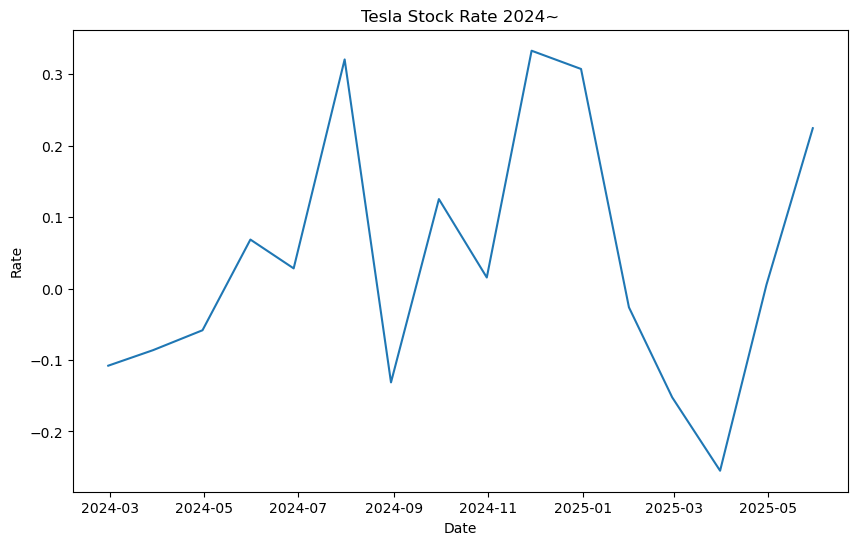

In [210]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=tsla_month.index, y=tsla_month["rtn"])
plt.title("Tesla Stock Rate 2024~")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.show()

In [211]:
tsla_month["MAE"] = tsla_month["Close"].rolling(2).mean()   # 종가 두달 평균 구하기
tsla_month

,Open,High,Low,Close,Volume,Adj Close,rtn,MAE
2024-01-31,217.457145,220.442856,213.241904,216.130476,1.116088e+08,216.130476,NaN,NaN
2024-02-29,191.735999,195.604501,188.311499,192.793001,1.009954e+08,192.793001,-0.107979,204.461739
2024-03-29,177.000002,180.102499,173.108500,176.163000,9.494521e+07,176.163000,-0.086258,184.478001
2024-04-30,165.411364,169.204091,162.154089,165.872272,1.126609e+08,165.872272,-0.058416,171.017636
2024-05-31,177.504091,180.495909,174.195908,177.231819,7.582640e+07,177.231819,0.068484,171.552046
2024-06-28,181.914210,185.694737,178.811053,182.220000,7.405459e+07,182.220000,0.028145,179.725909
2024-07-31,239.729544,247.027273,234.362272,240.621364,1.339143e+08,240.621364,0.320499,211.420682
2024-08-30,209.370911,214.086819,204.095000,209.010911,7.356241e+07,209.010911,-0.131370,224.816137
2024-09-30,234.301501,239.478500,230.095501,235.159999,8.056366e+07,235.159999,0.125109,222.085455
2024-10-31,239.483479,243.021305,234.379128,238.780436,8.307860e+07,238.780436,0.015396,236.970218


<Axes: >

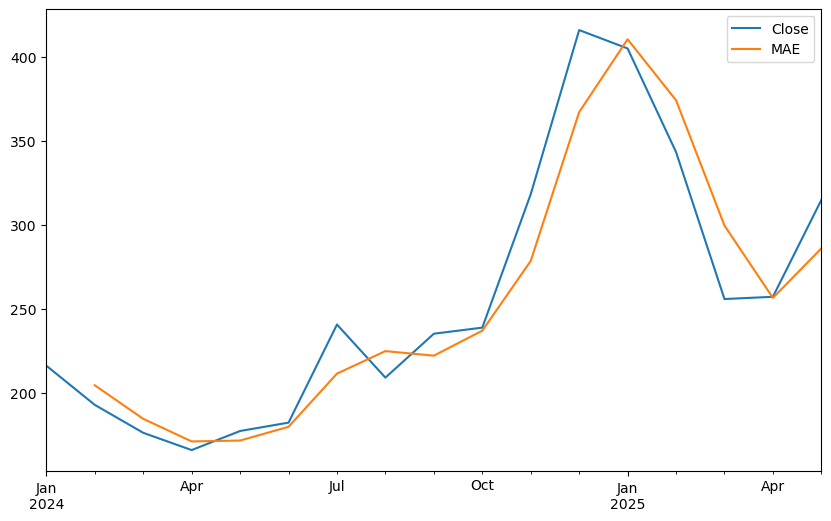

In [212]:
tsla_month.iloc[:, [3,7]].plot(figsize=(10, 6))

<Axes: >

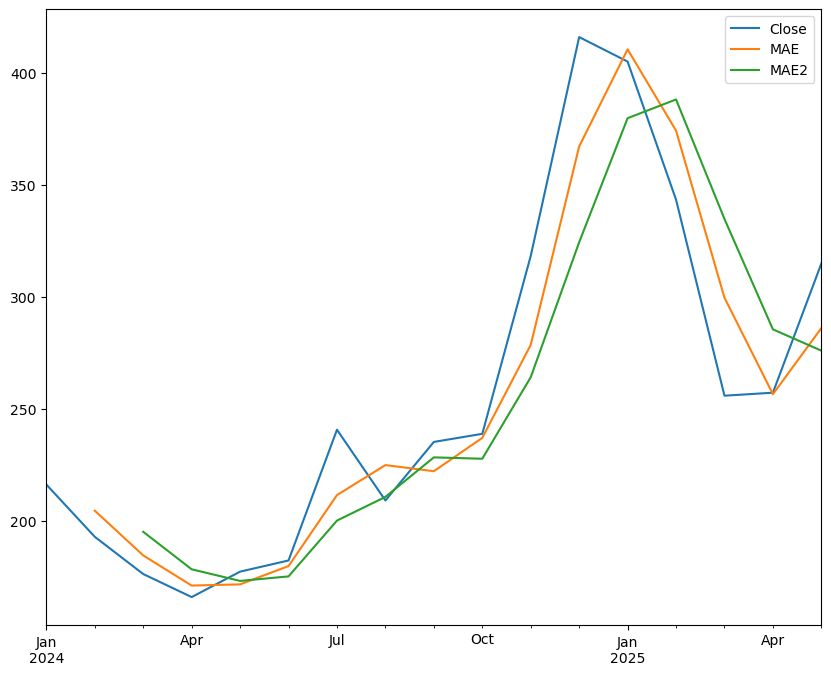

In [213]:
tsla_month["MAE2"] = tsla_month["Close"].rolling(3).mean()  # 세달 평균 종가
tsla_month.iloc[:, [3, 7, 8]].plot(figsize=(10, 8))

In [ ]:
last_close = tsla_month["MAE"].iloc[-2] # 이동평균선 60일 전의 종가
print(last_close)
price = tsla_month["Close"].iloc[-1]    # 오늘 종가
print(price)
if price > last_close:
    print("상승장")
elif price < last_close:
    print("하락장")
else:
    print("변동 없음")

256.47809673490974
314.821252822876
상승장


In [217]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [218]:
model = ARIMA(tsla_month["Close"].values, order=(0, 1, 2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   17
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -81.422
Date:                Fri, 23 May 2025   AIC                            168.843
Time:                        16:18:13   BIC                            171.161
Sample:                             0   HQIC                           168.962
                                 - 17                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7250      4.373      0.166      0.868      -7.845       9.295
ma.L2          0.9923     11.949      0.083      0.934     -22.428      24.413
sigma2      1167.8838   1.38e+04      0.085      0.933   -2.59e+04    2.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.79
Prob(Q):                              1.00   Prob(JB):                         0.41
Heteroskedasticity (H):              24.57   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [219]:
predict = model_fit.predict()
predict

array([  0.        , 216.49399643, 179.40797371, 165.0968557 ,
       164.3873644 , 185.83132174, 189.11018243, 271.05029718,
       207.37762567, 203.40832085, 284.74534999, 369.63928696,
       475.25200565, 396.42319669, 246.72279432, 215.86346071,
       293.39618144])

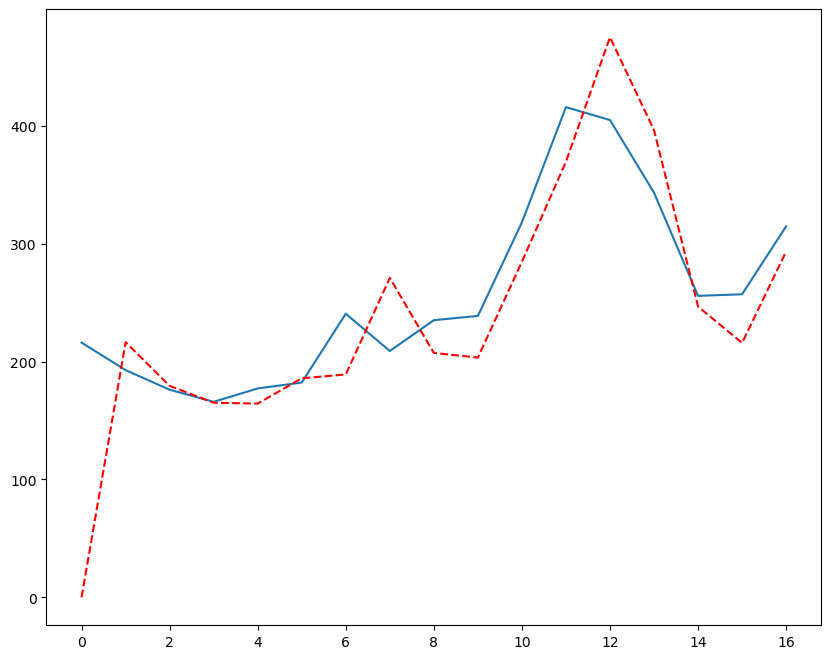

In [222]:
index = range(17)
plt.figure(figsize=(10, 8))
plt.plot(index, tsla_month["Close"], label="Actual")
plt.plot(index, predict, label="Prediction", linestyle="--", color="red")

In [226]:
forecast_data = model_fit.forecast(steps=5)
print(forecast_data)

[366.18699908 385.22993869 385.22993869 385.22993869 385.22993869]
